In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA, NMF
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [6]:
complete_dataset = pd.read_csv('complete_dataset.csv')
comments = complete_dataset['comments']
comments = comments.head(10000) #first 3000 comments
print(comments)
type(comments)

0       This class is hard, but its a two-in-one gen-e...
1       Definitely going to choose Prof. Looney\'s cla...
2       I overall enjoyed this class because the assig...
3       Yes, it\'s possible to get an A but you\'ll de...
4       Professor Looney has great knowledge in Astron...
                              ...                        
9995    Very Rude. Treats you like a child because she...
9996    This class about killed me. Seriously, this wa...
9997    This is a hard class. I don\'t know that I cou...
9998    You are grad students your not in kindergarten...
9999    This class is the biggest waste of my time pos...
Name: comments, Length: 10000, dtype: object


pandas.core.series.Series

In [5]:
comments_list = comments.tolist()
comments_list = [doc if isinstance(doc, str) else '' for doc in comments_list]
type(comments_list)
#print(comments_list)

list

In [4]:
vectorizer = CountVectorizer(max_features=500, stop_words='english') #max_df=0.5, min_df=5
bow_model = vectorizer.fit_transform(comments_list)
#print(bow_model)
#type(bow_model)
#print(bow_model.shape)
arr = bow_model.toarray()
print(arr.shape)

(10000, 500)


In [5]:
data = pd.read_csv('bagOfWords.csv_1000')
print(data)
X = data.values
print(data.columns)


      hard  twoinone  gened  knockout  content  stimulating  unlike  actually  \
0        1         1      1         1        1            1       1         1   
1        0         0      0         0        0            0       0         0   
2        0         0      0         0        0            0       0         0   
3        0         0      0         0        1            0       0         0   
4        0         0      0         0        0            0       0         0   
...    ...       ...    ...       ...      ...          ...     ...       ...   
9995     1         0      0         0        0            0       0         0   
9996     0         0      0         0        0            0       0         0   
9997     1         0      0         0        0            0       0         0   
9998     0         0      0         0        0            0       0         0   
9999     0         0      0         0        0            0       0         0   

      participate  pas  ...

In [6]:
LDA = LatentDirichletAllocation(n_components = 5, random_state = 42)

model = NMF(n_components=10, init='random', random_state=42)
W = model.fit(bow_model)
H = model.components_

LDA.fit(X) # LDA.fit(bow_model)

LatentDirichletAllocation(n_components=5, random_state=42)

In [7]:
document_topic_matrix = LDA.fit_transform(X)

In [8]:
feature_names = data.columns

In [9]:
print(feature_names)

Index(['hard', 'twoinone', 'gened', 'knockout', 'content', 'stimulating',
       'unlike', 'actually', 'participate', 'pas',
       ...
       'quixote', 'instrucotr', 'softie', 'promoted', 'bordenlineestoteric',
       'luis', 'lemos', 'trickster', 'borrowed', 'rewatch'],
      dtype='object', length=11029)


In [10]:
top_words_per_topic = []
for topic in LDA.components_:
    top_words = [feature_names[i] for i in topic.argsort()[-10:]]
    top_words_per_topic.append(top_words)

In [11]:
for i, list1 in enumerate(top_words_per_topic):
    print('Topic', i+1, end = "")
    print(list1)

Topic 1['highly', 'always', 'make', 'really', 'help', 'helpful', 'would', 'recommend', 'great', 'take']
Topic 2['question', 'give', 'would', 'good', 'get', 'easy', 'grade', 'take', 'test', 'no']
Topic 3['final', 'easy', 'take', 'reading', 'paper', 'read', 'test', 'time', 'book', 'lecture']
Topic 4['get', 'want', 'like', 'ever', 'time', 'work', 'really', 'best', 'lot', 'take']
Topic 5['lot', 'test', 'hard', 'take', 'lecture', 'interesting', 'easy', 'great', 'make', 'good']


In [12]:
topics_dict = {}
for doc_idx in range(len(document_topic_matrix)):
    topic_probs = document_topic_matrix[doc_idx]
    topic_idx = np.argmax(topic_probs)

    if topic_idx not in topics_dict:
        topics_dict[topic_idx] = []
        
    topics_dict[topic_idx].append(doc_idx)

In [13]:
final_data = []
for key, values in topics_dict.items():
    for value in values:
        final_data.append((value, key))
        
lda_labels = pd.DataFrame(final_data, columns=['Comment', 'LDA-Label'])
lda_labels.sort_values(by='Comment', inplace=True)
lda_labels.reset_index(drop=True, inplace=True)

In [14]:
lda_labels

,Comment,LDA-Label
0,0,4
1,1,1
2,2,2
3,3,1
4,4,4
...,...,...
9995,9995,0
9996,9996,1
9997,9997,0
9998,9998,1


In [15]:
lda_labels.to_csv('lda_labels.csv', index = False)

In [16]:
# label_topics = ['Positivity and Excellence', 'Education and Assessment', 'Work and Enjoyment', 'Course and Effectiveness', 'Testing and Performance']
label_topics = ["Student Experience", "Learning Challenges", "Course Engagement", "Course Evaluation", "Assessments and Grades"]

In [17]:
topic_to_label = {
    0: 'Student Experience',
    1: 'Learning Challenges',
    2: 'Course Engagement',
    3: 'Course Evaluation',
    4: 'Assessments and Grades'
}

In [19]:
# Define a new document as a list of lists of words representing multiple topics
new_document = [
    ['highly', 'always', 'make', 'really', 'help', 'helpful', 'would', 'recommend', 'great', 'take'],
    ['question', 'give', 'would', 'good', 'get', 'easy', 'grade', 'take', 'test', 'no'],
    ['final', 'easy', 'take', 'reading', 'paper', 'read', 'test', 'time', 'book', 'lecture'], 
    ['get', 'want', 'like', 'ever', 'time', 'work', 'really', 'best', 'lot', 'take'], 
    ['lot', 'test', 'hard', 'take', 'lecture', 'interesting', 'easy', 'great', 'make', 'good'],
    
]


In [20]:
# Preprocess the new document text (replace with your preprocessing steps)
new_document_text = [' '.join(topic_words) for topic_words in new_document]

# Load your previously trained CountVectorizer (replace with your vectorizer)
vectorizer = CountVectorizer(vocabulary=feature_names)  # Use your actual vocabulary

# Transform the new document text to a document-term matrix using the vectorizer
new_document_matrix = vectorizer.transform(new_document_text)

# Infer the topic distribution for the new document using the LDA model
new_document_topics = LDA.transform(new_document_matrix)

# Find the most relevant topic for each inner list
most_relevant_topics = np.argmax(new_document_topics, axis=1)

# Print the most relevant topics and corresponding labels for each inner list
for idx, topic_id in enumerate(most_relevant_topics):
    assigned_label = topic_to_label[topic_id]
    print(f"Inner List {idx + 1}: Most relevant topic: {topic_id}, Assigned label: {assigned_label}")

Inner List 1: Most relevant topic: 0, Assigned label: Student Experience
Inner List 2: Most relevant topic: 1, Assigned label: Learning Challenges
Inner List 3: Most relevant topic: 2, Assigned label: Course Engagement
Inner List 4: Most relevant topic: 3, Assigned label: Course Evaluation
Inner List 5: Most relevant topic: 4, Assigned label: Assessments and Grades


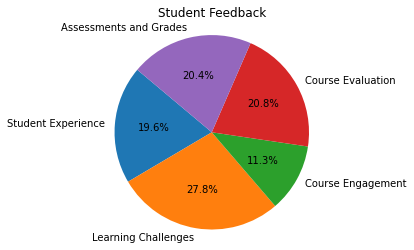

In [21]:
label_counts = lda_labels['LDA-Label'].value_counts().sort_index()
# labels = ['Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4']
labels = ["Student Experience", "Learning Challenges", "Course Engagement", "Course Evaluation", "Assessments and Grades"]
# colors = ['#2ECC71', '#F1C40F', '#95A5A6', '#9B59B6', '#FF5733']
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD']
# labels_with_counts = [f'{label_name} ({count})' for label_name, (labels, count) in zip(labels, label_counts.items())]
labels_with_counts = [f'{label_name}' for label_name, (labels, count) in zip(labels, label_counts.items())]
    
# plt.figure(figsize=(8, 8))  # Set the figure size

plt.pie(label_counts, labels=labels_with_counts, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.title('Student Feedback')
plt.savefig("pie_chart.png")
plt.show()
